<a href="https://colab.research.google.com/github/David-000001/Machine-learning-project/blob/main/Water_quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Water quality Analysis  using Machine learning alogorithms**
*   ###### *Water quality is deteriorating owing to industrial pollution discharge and human insensitivity, endangering human and aquatic life. Factors contributing to this include population increase, economic activity, agricultural expansion, and untreated sewage outflow. Groundwater is also impacted, and ocean pollution harms marine life. Water contamination is a serious concern in poor nations, causing illnesses such as cholera and typhoid fever.water pollution can cause hazardous diseases especially among children, it is important to test the water quality.*


**Team Members:**
<pre>
22076613​ :Kyaw Swe Sien Marma​

22089638​ :Avijit Chandra Dey ​

22111294​ :Jubair Ibne Abdullah​

22101921​ :Li jinzhe​

23055727​ :Anas Abdurahman Mohammad ​



In [ ]:
#linear algebra
import numpy as np

# data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.metrics import classification_report, accuracy_score
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn import tree

#miscellaneous
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing & Exploratory Data Analysis

In [ ]:
df=pd.read_csv(r"/content/water_potability.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105 entries, 0 to 4104
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3476 non-null   float64
 1   Hardness         4105 non-null   float64
 2   Solids           4105 non-null   float64
 3   Chloramines      4105 non-null   float64
 4   Sulfate          3149 non-null   float64
 5   Conductivity     4105 non-null   float64
 6   Organic_carbon   4105 non-null   float64
 7   Trihalomethanes  3902 non-null   float64
 8   Turbidity        4105 non-null   float64
 9   Potability       4105 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 320.8 KB


In [ ]:
#Basic statistical details
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  3476.000000  4105.000000   4105.000000  4105.000000  3149.000000   
mean      7.109737   196.441768  22083.239674     7.124374   334.278524   
std       1.577804    32.874479   8595.249895     1.544620    42.014861   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.150537   176.753500  15873.034430     6.154073   307.397088   
50%       7.083040   197.102725  21051.256910     7.136008   333.482540   
75%       8.040239   217.043127  27312.168380     8.109346   361.440487   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   4105.000000     4105.000000      3902.000000  4105.000000  4105.000000  
mean     425.863539       14.360520        66.366233     3.972660     0.370280  
std       80.839232        3.342888        16.132553     0.774945     0.482938  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      364.919492       12.085026        55.905770     3.453439     0.000000  
50%      421.060326       14.319411        66.660416     3.955091     0.000000  
75%      481.318803       16.642815        77.209117     4.512332     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [ ]:
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  6.767676  254.455500  20791.31898     7.778730  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [ ]:
#checking the null values
df.isna().sum()

ph                 629
Hardness             0
Solids               0
Chloramines          0
Sulfate            956
Conductivity         0
Organic_carbon       0
Trihalomethanes    203
Turbidity            0
Potability           0
dtype: int64

In [ ]:
print("ph mean:",df["ph"].mean())
print("Sulfate mean:",df["Sulfate"].mean())
print("Trihalomethanes mean:", df["Trihalomethanes"].mean())

ph mean: 7.10973725395656
Sulfate mean: 334.2785243051446
Trihalomethanes mean: 66.36623332257227


In [ ]:
#filling the misiing values
df['ph'] = df['ph'].fillna(7.0)
df['Sulfate'] = df['Sulfate'].fillna(333.7)
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(66.3)

In [ ]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

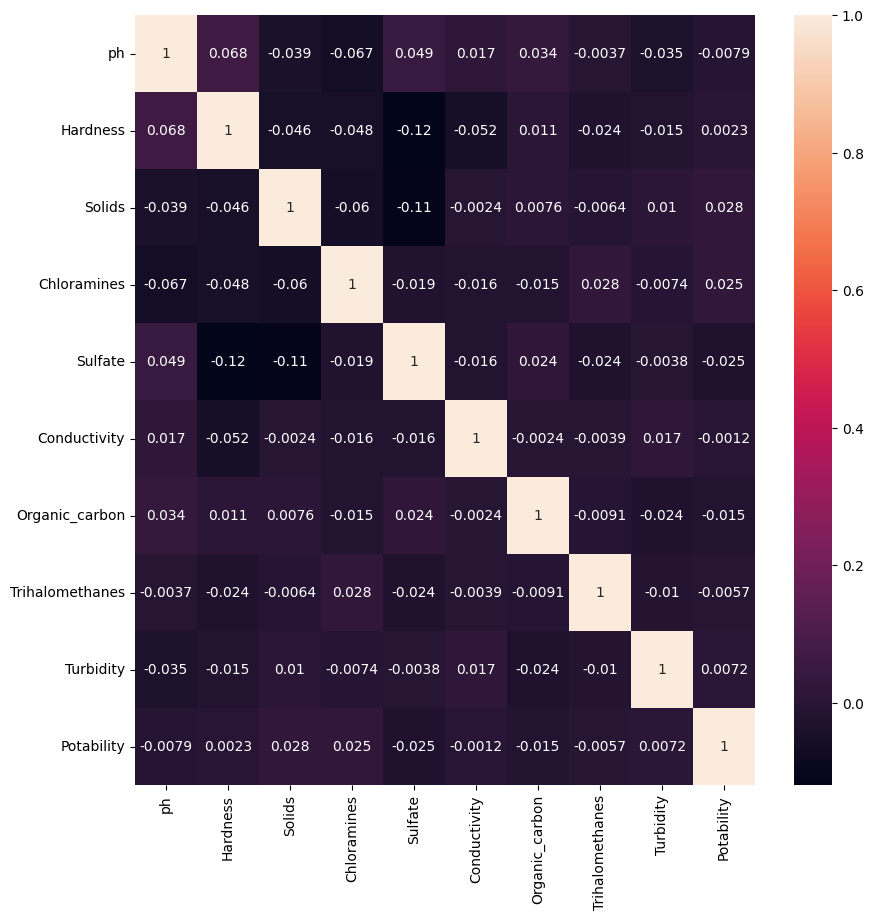

In [ ]:
#Heat map
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt=".2g")
plt.show()

In [ ]:
x = df.drop("Potability", axis=1)
y = df.Potability
X_train , X_test , y_train , y_test = train_test_split(x , y, test_size=0.25, random_state=42)

The percentage of waters that are potable is: 37.03%


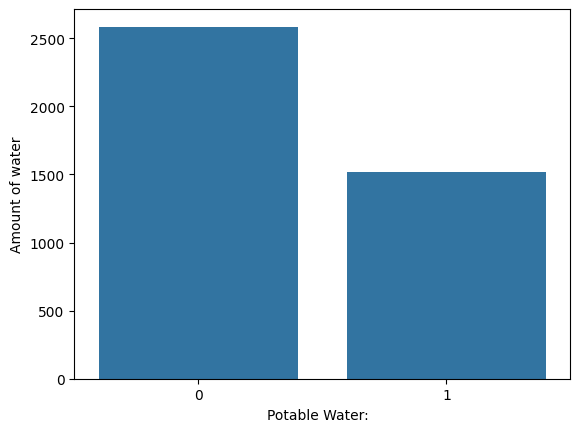

In [ ]:
sns.countplot(x="Potability",data=df, )
plt.xlabel('Potable Water:  ')
plt.ylabel('Amount of water')
porc = (len(df[df.Potability==1]) / len(df.Potability)) * 100
print('The percentage of waters that are potable is: {:.2f}%'.format(porc))

In [ ]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [ ]:
df[df['Potability']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [ ]:
df[df['Potability']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

In [ ]:
x.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  4105.000000  4105.000000   4105.000000  4105.000000  4105.000000   
mean      7.092922   196.441768  22083.239674     7.124374   334.143794   
std       1.452405    32.874479   8595.249895     1.544620    36.798169   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.347020   176.753500  15873.034430     6.154073   316.778999   
50%       7.000000   197.102725  21051.256910     7.136008   333.700000   
75%       7.861178   217.043127  27312.168380     8.109346   351.271267   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  
count   4105.000000     4105.000000      4105.000000  4105.000000  
mean     425.863539       14.360520        66.362958     3.972660  
std       80.839232        3.342888        15.728510     0.774945  
min      181.483754        2.200000         0.738000     1.450000  
25%      364.919492       12.085026        56.711024     3.453439  
50%      421.060326       14.319411        66.300000     3.955091  
75%      481.318803       16.642815        76.524270     4.512332  
max      753.342620       28.300000       124.000000     6.739000

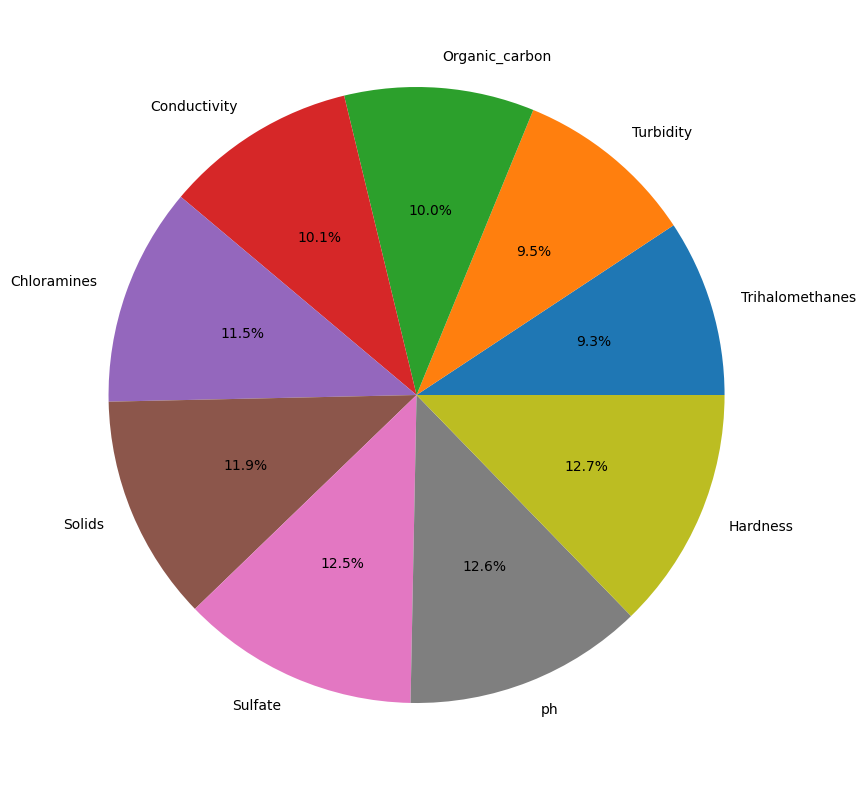

In [ ]:
#Finding out the most important variables
clasification = RandomForestClassifier()
clasification.fit(x,y)

variables = x.columns
importance = pd.DataFrame()

importance['Features'] = variables
importance['Importance'] = clasification.feature_importances_
importance = importance.sort_values(by=['Importance'],ascending=True)

labels = importance['Features']
values = importance['Importance']

plt.figure(figsize=(10,10))
plt.pie(values, labels=labels,autopct='%0.1f%%')
plt.show()

The pie chart shows how each component's importance is similar to the others. It is clear that the relevance of each component is almost identical to that of the others. That is why we have determined that no variable is worth deleting, since if we delete, say, Turbidity, there is no reason not to eliminate Conductivity or Solids as well, because it is evident that all of them are equally important.

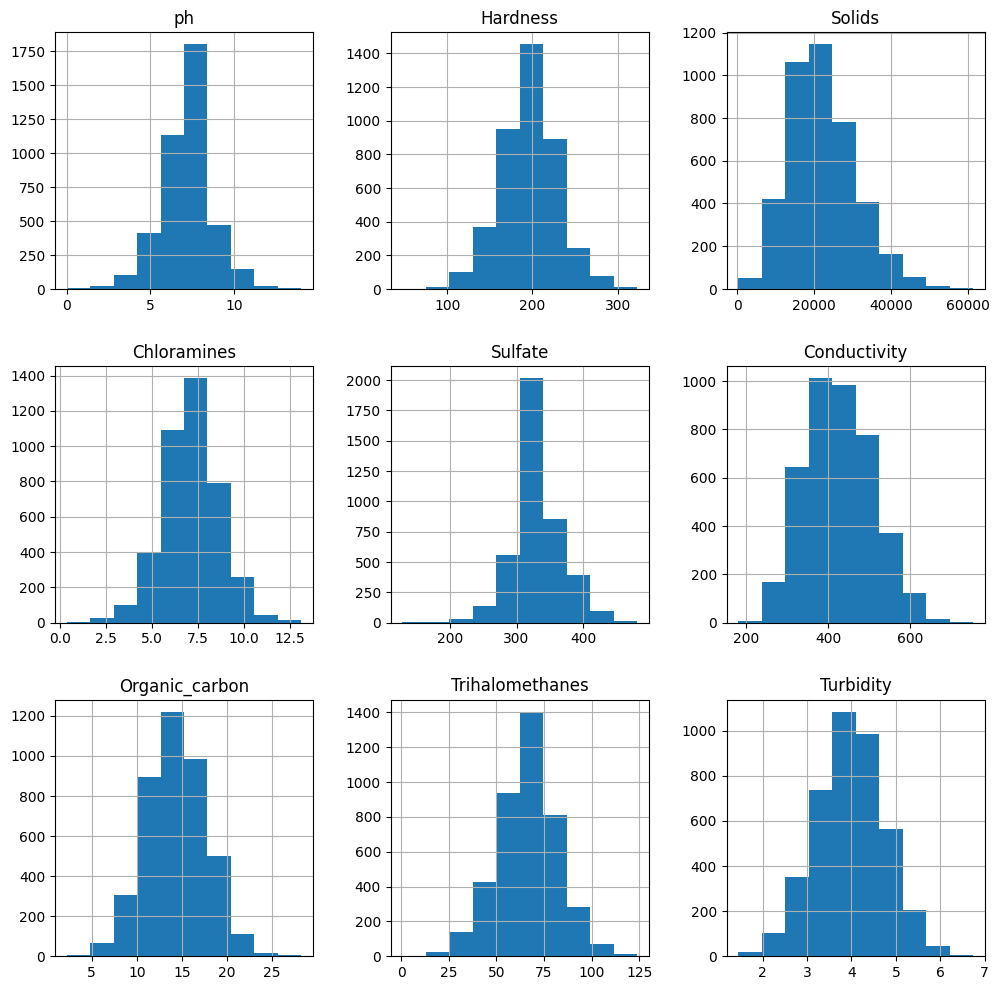

In [ ]:
#Histograms
fig = plt.figure(figsize = (12,12))
var = df.drop("Potability", axis=1)
ax = fig.gca()
var.hist(ax=ax)
plt.show()

<Axes: xlabel='ph', ylabel='Count'>

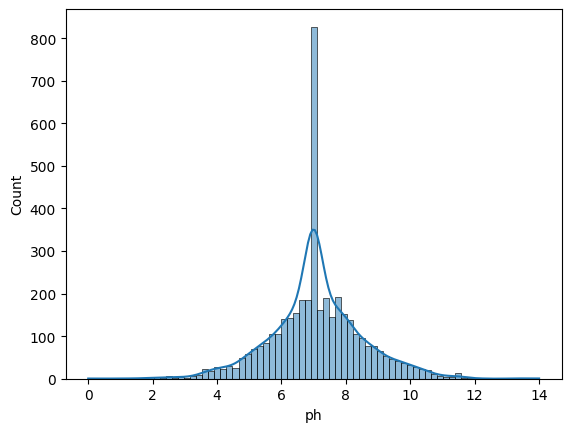

In [ ]:
sns.histplot(df.ph,kde = True)

In [ ]:
df[['ph','Sulfate','Trihalomethanes']].describe().T

count        mean        std      min         25%    50%  \
ph               4105.0    7.092922   1.452405    0.000    6.347020    7.0   
Sulfate          4105.0  334.143794  36.798169  129.000  316.778999  333.7   
Trihalomethanes  4105.0   66.362958  15.728510    0.738   56.711024   66.3   

                        75%         max  
ph                 7.861178   14.000000  
Sulfate          351.271267  481.030642  
Trihalomethanes   76.524270  124.000000

<Axes: xlabel='ph', ylabel='Sulfate'>

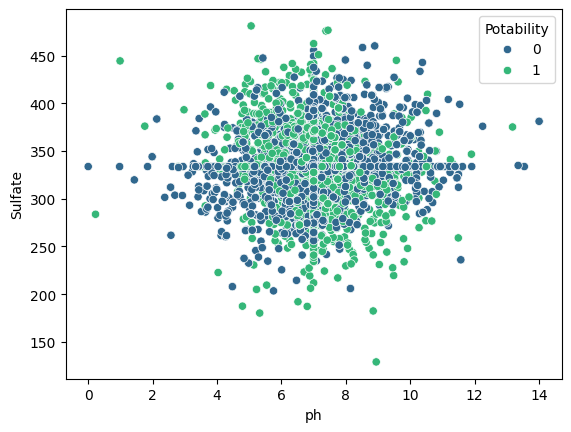

In [ ]:
sns.scatterplot(data = df, x = "ph",y = "Sulfate",hue="Potability",palette="viridis")

<Axes: xlabel='ph', ylabel='Trihalomethanes'>

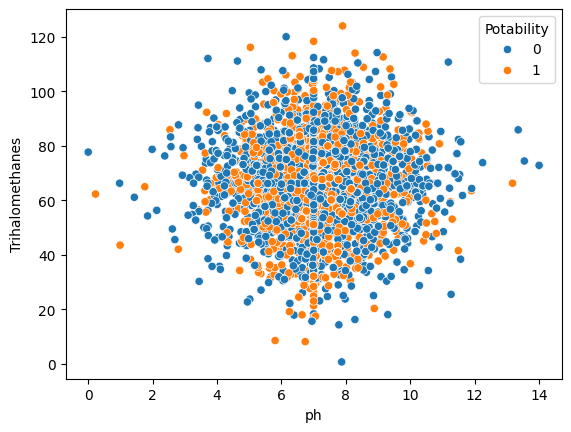

In [ ]:
sns.scatterplot(data = df,x='ph',y="Trihalomethanes",hue="Potability")

<Axes: xlabel='Trihalomethanes', ylabel='Sulfate'>

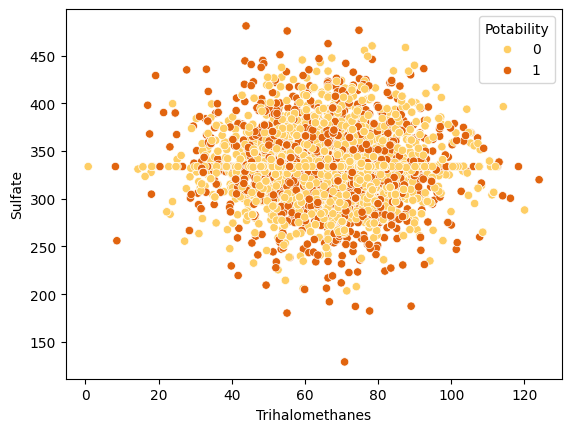

In [ ]:
sns.scatterplot(data = df, x = "Trihalomethanes",y = "Sulfate",hue="Potability",palette="YlOrBr")

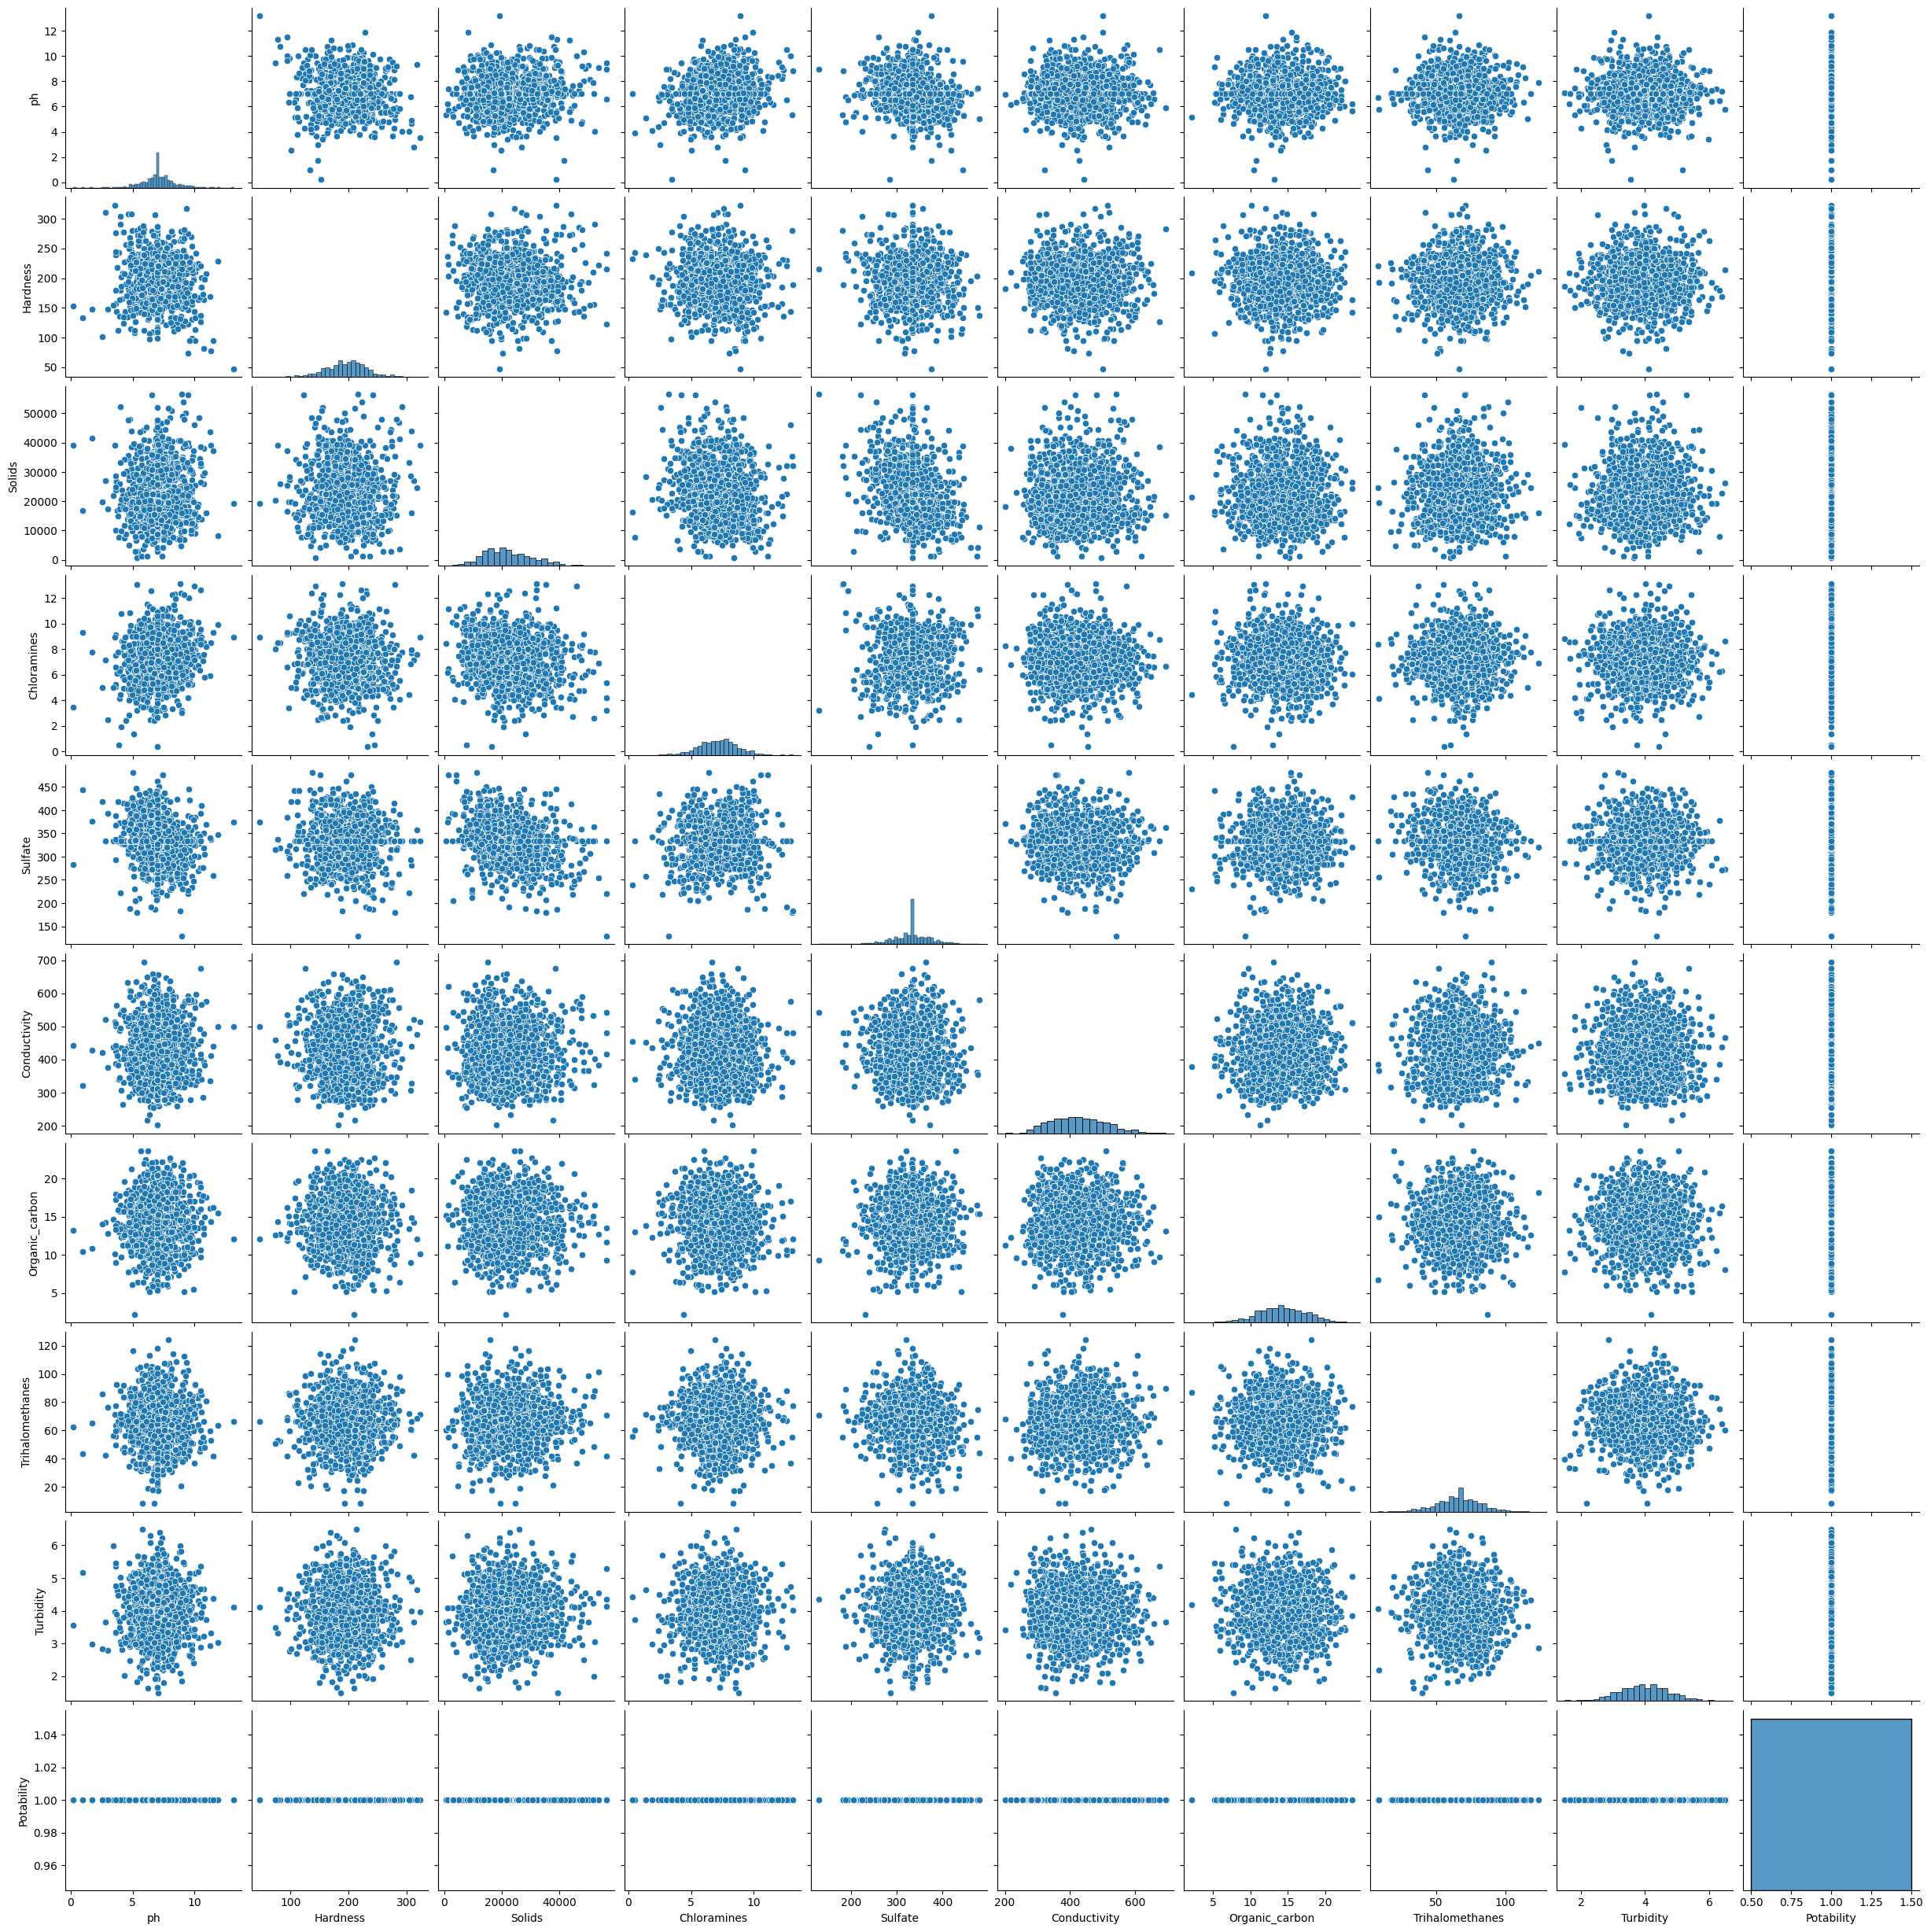

In [ ]:
positive = df[df['Potability'] == 1]
sns.pairplot(positive)

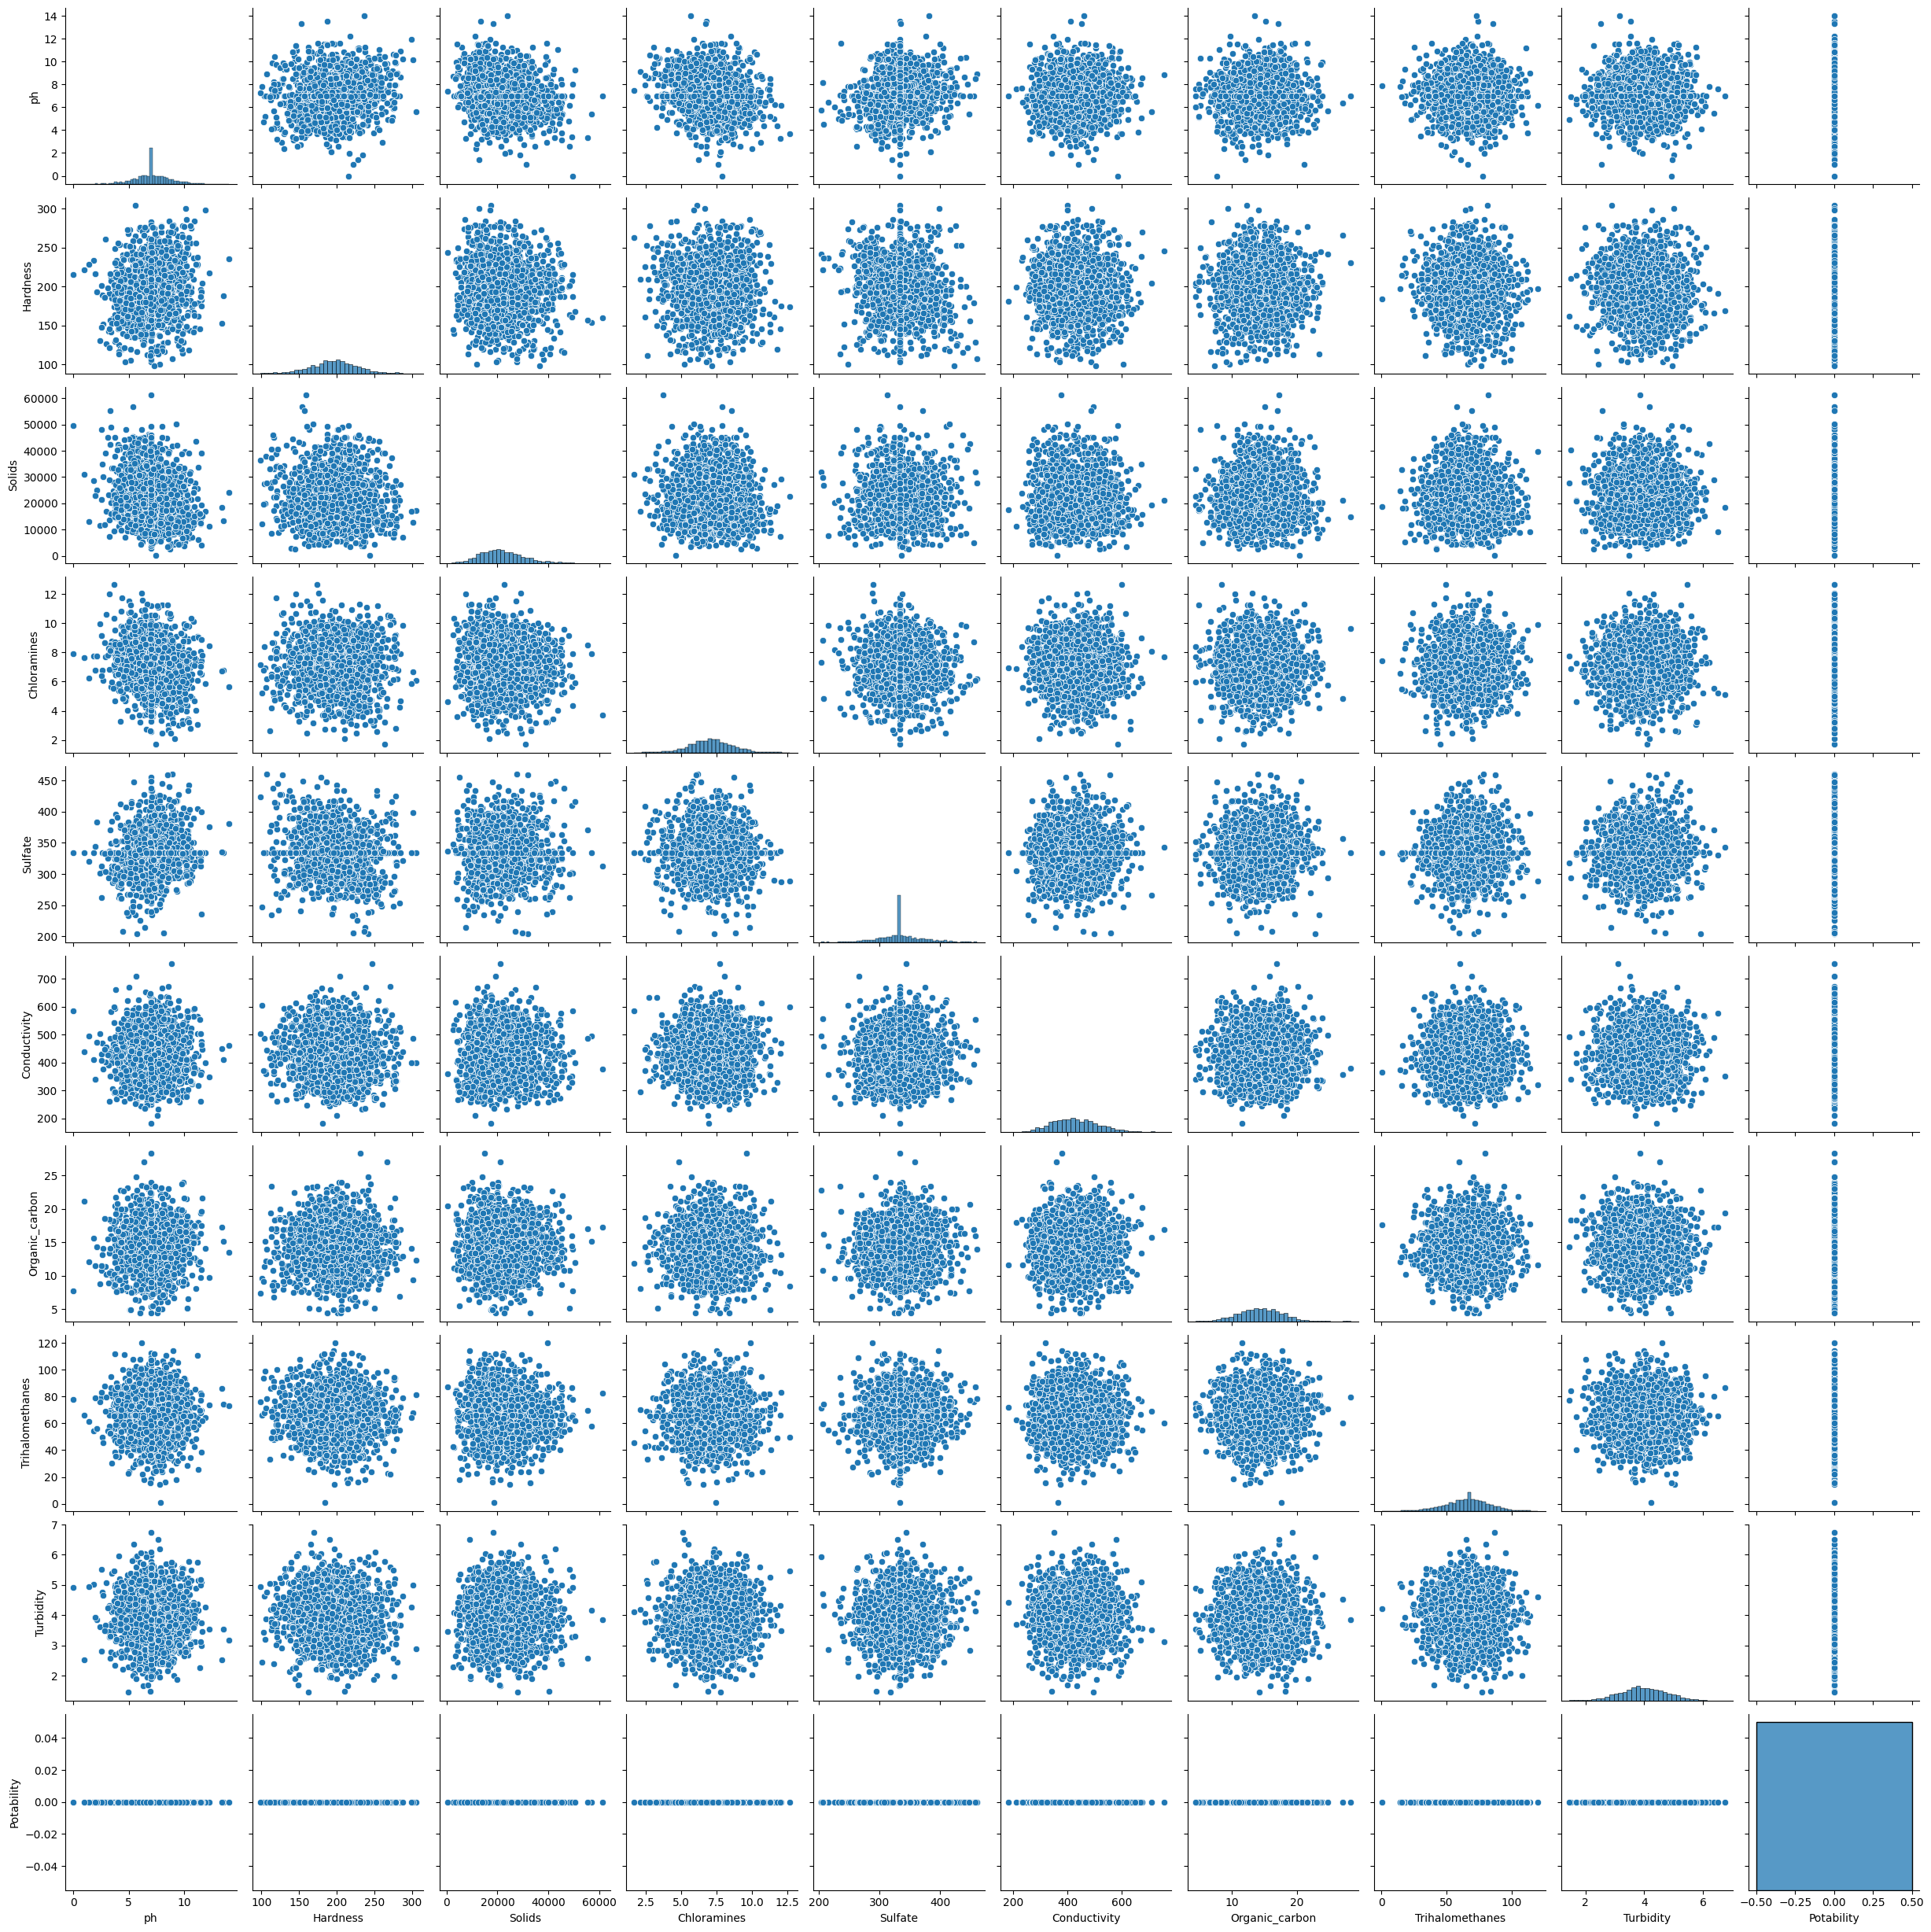

In [ ]:
negative = df[df['Potability'] == 0]
sns.pairplot(negative)

We can observe the distribution of individual variables as well as the relationships between two variables by using pair plots.

# KNN IMPLEMENTATION

In [ ]:
X = df.drop(['Potability'],axis=1)
Y = df['Potability']
X_stdscle = StandardScaler().fit_transform(X.values)

**Hyperparamter in KNN is**

**1.**  k: nearest neigbors which we compute while training the model. default:5

**2.**   p: Power parameter for the minkowski metric. When p = 1, this is equivalent to using manhattan_distance,and euclidean_distance for p = 2.(default = 2)

**3.**  metric: str or callable, default=’minkowski’.The distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric.





RESULT 1

In [ ]:
#Training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors =5,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier()



 KNeighborsClassifier()
*  k: Here we have taken nearest neighbor as 5(default value).
*   p: Taken p=2 to find euclidean_distance (default value)
*  metric: We have taken default=’minkowski’(default value)


In [ ]:
#Printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  77.967
Test Accuracy :  66.55799999999999
Confusion Matrix:
[[619 134]
 [278 201]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.69      0.82      0.75       753
           1       0.60      0.42      0.49       479

    accuracy                           0.67      1232
   macro avg       0.65      0.62      0.62      1232
weighted avg       0.66      0.67      0.65      1232



RESULT 2

In [ ]:
#Training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 3,p=2,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

* k: Here we have taken nearest neighbor as 3.
* p: Taken p=2 to find euclidean_distance
* metric: We have taken default=’minkowski’

In [ ]:
#Printing the accuracy and all other scores
print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  83.43199999999999
Test Accuracy :  68.669
Confusion Matrix:
[[609 144]
 [242 237]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.72      0.81      0.76       753
           1       0.62      0.49      0.55       479

    accuracy                           0.69      1232
   macro avg       0.67      0.65      0.66      1232
weighted avg       0.68      0.69      0.68      1232



RESULT 3

In [ ]:
#Training the KNN model and predicting the classes
X_stdscle_df = pd.DataFrame(X_stdscle, index=X.index, columns=X.columns)
x_train, x_test, y_train, y_test = train_test_split(X_stdscle_df,Y,test_size=0.3, random_state =1)
knn_clf = KNeighborsClassifier(n_neighbors = 2,p=1,metric='minkowski')
knn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2, p=1)



1.   k: Here we have taken nearest neighbor as 2.

2.  p: Taken p=1 to find manhattan_distance
   
3.  metric: We have taken default=’minkowski’


In [ ]:
#Printing the accuracy and all other scores

print("Train Accuracy : ", 100*(round(accuracy_score(y_train,knn_clf.predict(x_train)),5)))
print("Test Accuracy : ", 100*(round(accuracy_score(y_test,knn_clf.predict(x_test)),5)))
result = confusion_matrix(y_test, knn_clf.predict(x_test))
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, knn_clf.predict(x_test)))

Train Accuracy :  84.54599999999999
Test Accuracy :  67.776
Confusion Matrix:
[[689  64]
 [333 146]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.92      0.78       753
           1       0.70      0.30      0.42       479

    accuracy                           0.68      1232
   macro avg       0.68      0.61      0.60      1232
weighted avg       0.68      0.68      0.64      1232



In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print("MSE:",mean_squared_error(y_test, knn_clf.predict(x_test)))

# RMSE
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, knn_clf.predict(x_test))))

#MAE
from sklearn.metrics import mean_absolute_error
print("MAE:",mean_absolute_error(y_test, knn_clf.predict(x_test)))

#R2
from sklearn.metrics import r2_score
print("R2:",r2_score(y_test, knn_clf.predict(x_test)))

MSE: 0.3222402597402597
RMSE: 0.5676620999681586
MAE: 0.3222402597402597
R2: -0.3560344564677964


Text(50.722222222222214, 0.5, 'Prediction Label')

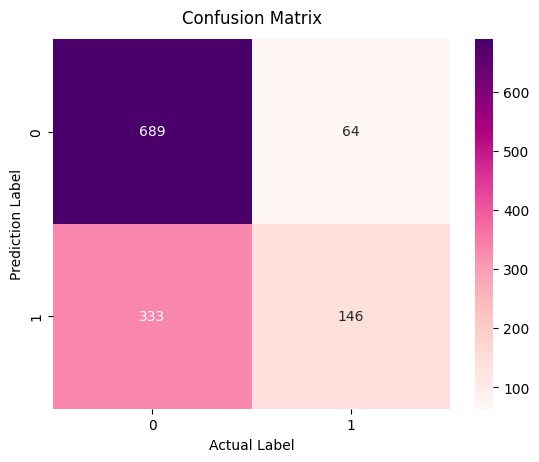

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, knn_clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

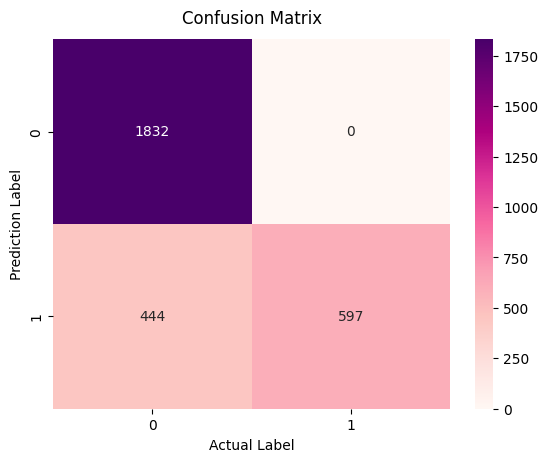

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, knn_clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parameters</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>k:5,p:2</td>
        <td  style='text-align:center'>Train: 77.967 , Test:66.558 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>k:3,p:2</td>
        <td  style='text-align:center'>Train: 83.432 , Test:68.669 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>k:2,p:1</td>
        <td  style='text-align:center'>Train: 84.546 , Test: 67.776</td>
    </tr>



# DECISION TREE IMPLEMENTATION

The Decision Tree hyperparameter is

1. criteria: The means of gauging a split's quality. "Entropy" for information gain and "gini" for Gini impurity are supported criteria. (default='gini')
2. maximum depth The max_depth setting is among the most crucial ones. It conveys the essence of the tree's potential depth. The tree can extract more information from the characteristics if it has greater depth. But sometimes, too much depth could be concerning because it also tends to result in overfitting.('None' is the default)

3. splitter: The method by which each node's split is determined. The "best" and "random" techniques are supported for selecting the best split and random split, respectively.('best' by default)


RESULT 1

In [ ]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=3,splitter='best')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 64.88
Test Accuracy: 62.175324675324674
Confusion Matrix:
[[741  12]
 [454  25]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.62      0.98      0.76       753
           1       0.68      0.05      0.10       479

    accuracy                           0.62      1232
   macro avg       0.65      0.52      0.43      1232
weighted avg       0.64      0.62      0.50      1232



RESULT 2

In [ ]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='random')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 74.42
Test Accuracy: 66.3961038961039
Confusion Matrix:
[[681  72]
 [342 137]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.67      0.90      0.77       753
           1       0.66      0.29      0.40       479

    accuracy                           0.66      1232
   macro avg       0.66      0.60      0.58      1232
weighted avg       0.66      0.66      0.62      1232



RESULT 3

In [ ]:
# Create Decision tree classifier object
clf = DecisionTreeClassifier(criterion='entropy',max_depth=12,splitter='best')

# Train Decision Tree Classifier
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)
acc_decision_tree = round(clf.score(x_train, y_train) * 100, 2)

#Model Accuracy, how often is the classifier correct?
print("Train accuracy:",acc_decision_tree)
print("Test Accuracy:", 100*(metrics.accuracy_score(y_test, y_pred)))

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
print("Classification Report : \n", classification_report(y_test, y_pred))

Train accuracy: 87.43
Test Accuracy: 68.83116883116884
Confusion Matrix:
[[630 123]
 [261 218]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.71      0.84      0.77       753
           1       0.64      0.46      0.53       479

    accuracy                           0.69      1232
   macro avg       0.67      0.65      0.65      1232
weighted avg       0.68      0.69      0.68      1232



<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parameters</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:3,splitter:best</td>
        <td  style='text-align:center'>Train: 64.88 , Test:62.175 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:12,splitter:random</td>
        <td  style='text-align:center'>Train: 74.42 , Test:66.396 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>criterion:entropy,max_depth:12,splitter:best</td>
        <td  style='text-align:center'>Train: 87.43 , Test: 68.831</td>
    </tr>



In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.3116883116883117
0.5582905262390825
0.3116883116883117
-0.3116303055003371


Text(50.722222222222214, 0.5, 'Prediction Label')

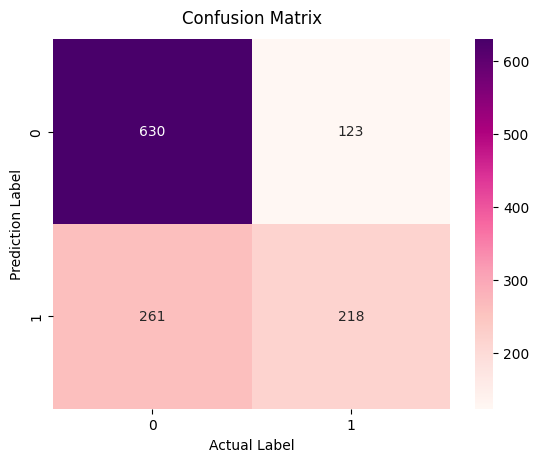

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, clf.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

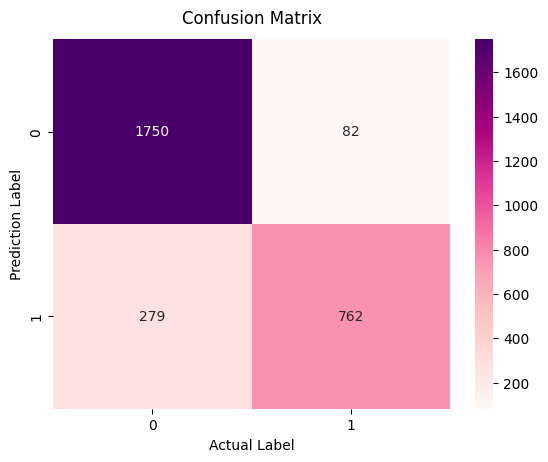

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, clf.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

64.87991646362687
62.175324675324674


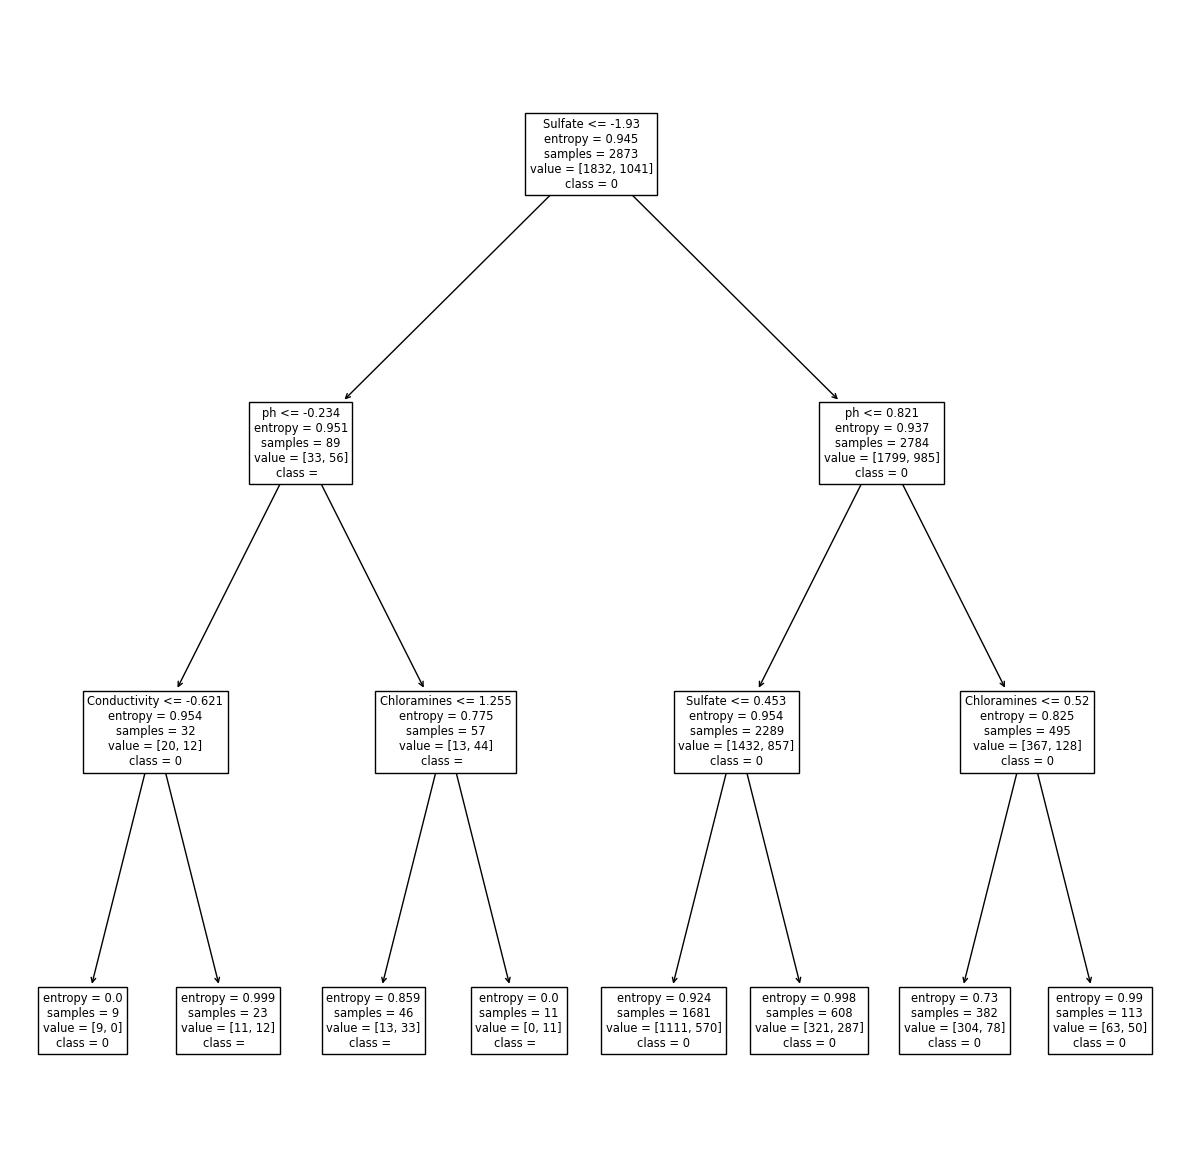

In [ ]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train, y_train)
print(metrics.accuracy_score(y_train, model.predict(x_train)) * 100)
print(metrics.accuracy_score(y_test, model.predict(x_test)) * 100)

fig, ax = plt.subplots(1, 1, figsize = (15, 15))
#x_aux = pd.DataFrame(x)
tree.plot_tree(model, impurity = True, class_names = str(Y),feature_names = X.columns);

# **RANDOM FOREST IMPLEMENTATION**

Hyperparamter in Random Forest is

1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. (default='gini')
2. max_depth: Max_depth is one of the most important parameters is max_depth. It captures the essence of how deep the tree can get. More depth in the tree means that it is able to extract more information from the features. However, sometimes, excessive depth might be a cause of worry as it tends to bring along overfitting as well.(default = 'None')
3. n_estimators: n_estimators is the parameter used here to predict accuracy, it is the number of trees in the foreset.(default = 100)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150,criterion='entropy',max_depth = 10)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
test_acc_rf = round(classifier.score(x_train, y_train) *100 , 2)
print("Train Accuracy",test_acc_rf)
result2 = accuracy_score(y_test,rf_pred)*100
print("Test Accuracy:",result2)

Confusion Matrix:
[[728  25]
 [354 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.97      0.79       753
           1       0.83      0.26      0.40       479

    accuracy                           0.69      1232
   macro avg       0.75      0.61      0.60      1232
weighted avg       0.74      0.69      0.64      1232

Train Accuracy 80.93
Test Accuracy: 69.23701298701299


RESULT 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500,criterion='entropy',max_depth = 8)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
test_acc_rf = round(classifier.score(x_train, y_train) *100 , 2)
print("Train Accuracy",test_acc_rf)
result2 = accuracy_score(y_test,rf_pred)*100
print("Test Accuracy:",result2)

Confusion Matrix:
[[738  15]
 [381  98]]
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.98      0.79       753
           1       0.87      0.20      0.33       479

    accuracy                           0.68      1232
   macro avg       0.76      0.59      0.56      1232
weighted avg       0.74      0.68      0.61      1232

Train Accuracy 75.88
Test Accuracy: 67.85714285714286


RESULT 3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100,criterion='entropy',max_depth = None)
classifier.fit(x_train, y_train)
rf_pred = classifier.predict(x_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, rf_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, rf_pred)
print("Classification Report:",)
print (result1)
test_acc_rf = round(classifier.score(x_train, y_train) *100 , 2)
print("Train Accuracy",test_acc_rf)
result2 = accuracy_score(y_test,rf_pred)*100
print("Accuracy:",result2)

Confusion Matrix:
[[709  44]
 [259 220]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.94      0.82       753
           1       0.83      0.46      0.59       479

    accuracy                           0.75      1232
   macro avg       0.78      0.70      0.71      1232
weighted avg       0.77      0.75      0.73      1232

Train Accuracy 100.0
Accuracy: 75.40584415584416


In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, rf_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, rf_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,rf_pred))

0.24594155844155843
0.4959249524288513
0.24594155844155843
-0.03495828793385969


Text(50.722222222222214, 0.5, 'Prediction Label')

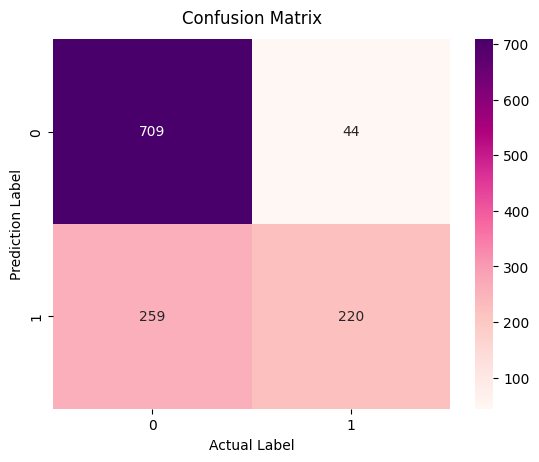

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, classifier.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

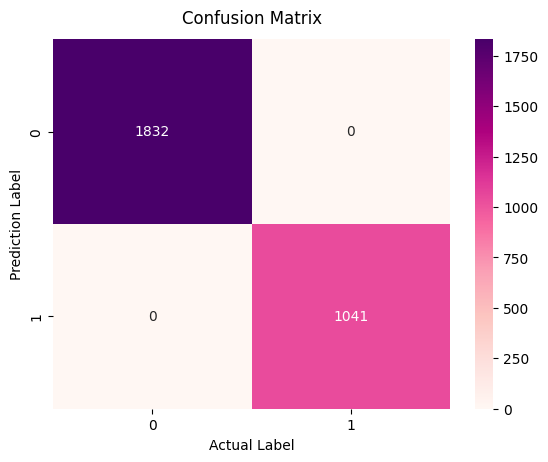

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, classifier.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

In [ ]:
importances=pd.DataFrame({'feature':X_train.columns,'importance':np.round(classifier.feature_importances_,3)})
importances=importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(100)

importance
feature                    
Hardness              0.124
ph                    0.123
Sulfate               0.122
Chloramines           0.115
Solids                0.114
Conductivity          0.103
Organic_carbon        0.102
Trihalomethanes       0.098
Turbidity             0.098

<Axes: xlabel='feature'>

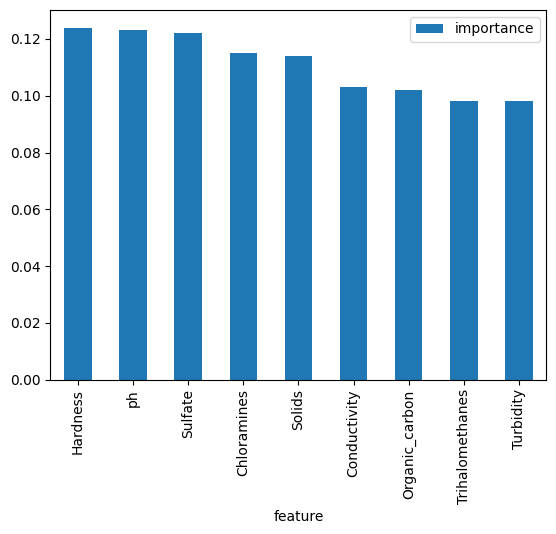

In [ ]:
importances.plot.bar()

# **NAIVE BAYES IMPLEMENTATION**

In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
g_pred = gaussian.predict(x_test)
train_acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)
test_acc_gaussian = round(gaussian.score(x_test, y_test) * 100, 2)
result = confusion_matrix(y_test, g_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, g_pred)
print("Classification Report:",)
print (result1)
print('Train Accuracy:',train_acc_gaussian)
print('Test Accuracy:',test_acc_gaussian)

Confusion Matrix:
[[694  59]
 [404  75]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.92      0.75       753
           1       0.56      0.16      0.24       479

    accuracy                           0.62      1232
   macro avg       0.60      0.54      0.50      1232
weighted avg       0.60      0.62      0.55      1232

Train Accuracy: 63.73
Test Accuracy: 62.42


Here, we assume that the features follow a normal distribution. Instead of discrete counts, we have continuous features.

In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, g_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, g_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, g_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,g_pred))

0.3758116883116883
0.6130348181887293
0.3758116883116883
-0.5814709152256667


# **LOGISTIC REGRESSION IMPLEMENTATION**


Hyperparamter in Logistic Regression is

1. n_jobs: n_jobs specifies the number of CPU cores used for key machine learning tasks.(default:None, Maximum number of iterations taken for the solvers to converge.)
2. max_depth: max_depth: Indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. (Default value is none i.e. nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples)
3. random_state: Random state ensures that the splits that you generate are reproducible. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.(default=None)

In [ ]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=100,random_state=1, n_jobs=10)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  63.77
Test Accuracy: 61.12012987012987
Confusion Matrix:
[[753   0]
 [479   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       753
           1       0.00      0.00      0.00       479

    accuracy                           0.61      1232
   macro avg       0.31      0.50      0.38      1232
weighted avg       0.37      0.61      0.46      1232



In [ ]:
#Logistic Regression
lr_model = LogisticRegression(max_iter=120,random_state=0, n_jobs=20)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
acc_log = round(lr_model.score(x_train, y_train) * 100, 2)
lr = 100*(accuracy_score(y_test, lr_pred))
print("Train Accuracy: " ,acc_log)
print("Test Accuracy: " + str(lr))
result = confusion_matrix(y_test,lr_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, lr_pred)
print("Classification Report:",)
print (result1)

Train Accuracy:  63.77
Test Accuracy: 61.12012987012987
Confusion Matrix:
[[753   0]
 [479   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       753
           1       0.00      0.00      0.00       479

    accuracy                           0.61      1232
   macro avg       0.31      0.50      0.38      1232
weighted avg       0.37      0.61      0.46      1232



Text(50.722222222222214, 0.5, 'Prediction Label')

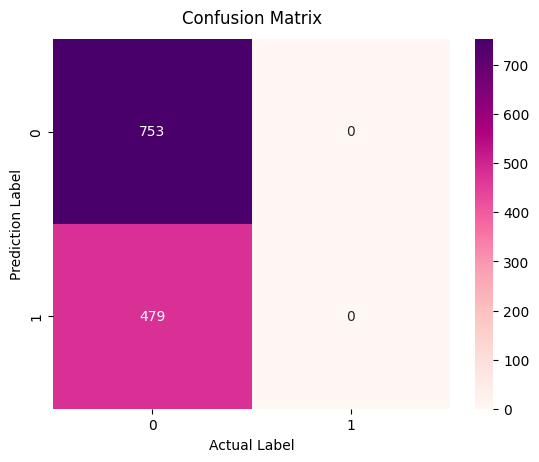

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, lr_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

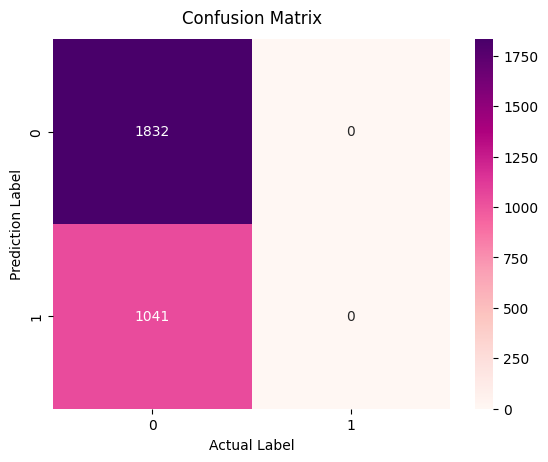

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, lr_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Parameters</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>max_iter=100,random_state=1,n_jobs=10</td>
        <td  style='text-align:center'>Train: 63.77,Test:61.120 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>max_iter=120,random_state=0,n_jobs=20</td>
        <td  style='text-align:center'>Train: 63.77,Test:61.120</td>
    </tr>

# **SCHOLASTIC GRADIENT IMPLEMENTATION**

In [ ]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
sgd_pred = sgd.predict(x_test)
acc_sgd = round(sgd.score(x_train, y_train) * 100, 2)
test_acc_sgd = round(sgd.score(x_test, y_test) * 100, 2)
print('Accuracy on training data : ', acc_sgd)
print('Accuracy on test data : ', test_acc_sgd)
result = confusion_matrix(y_test,sgd_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, sgd_pred)
print("Classification Report:",)
print (result1)

Accuracy on training data :  63.77
Accuracy on test data :  60.88
Confusion Matrix:
[[748   5]
 [477   2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.99      0.76       753
           1       0.29      0.00      0.01       479

    accuracy                           0.61      1232
   macro avg       0.45      0.50      0.38      1232
weighted avg       0.48      0.61      0.47      1232



In [ ]:
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, sgd_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, sgd_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, sgd_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test,sgd_pred))

0.3912337662337662
0.625486823389403
0.3912337662337662
-0.6463692897165689


Text(50.722222222222214, 0.5, 'Prediction Label')

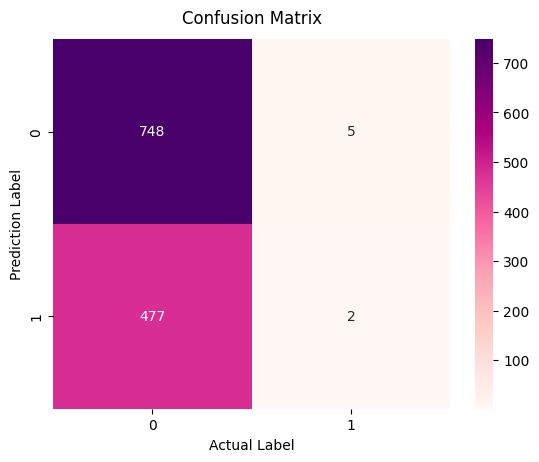

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, sgd.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

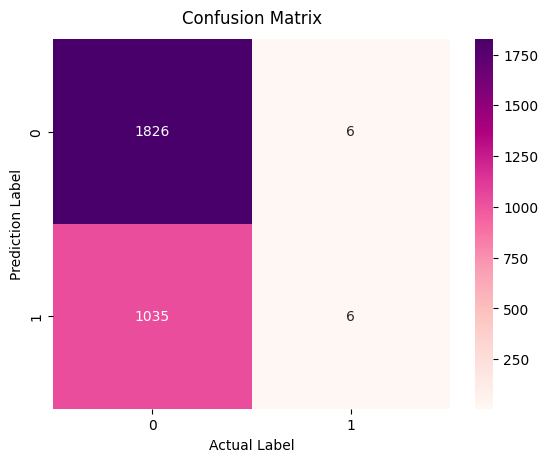

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, sgd.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

# SUPPORT VECTOR MACHINE IMPLEMENTATION


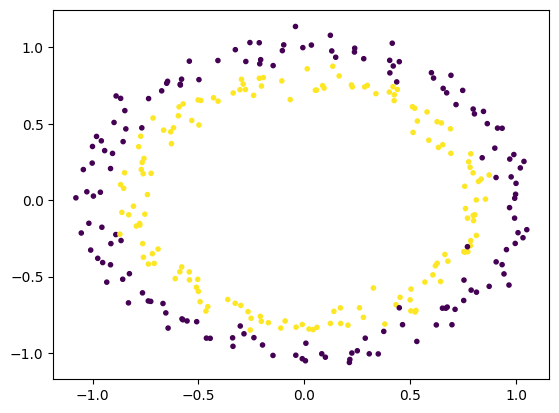

In [ ]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

We are able to observe how the data are divided, and we may begin by selecting a non-linear SVM.

We have used kernel='rbf' in the code below because we are building an SVM for non-linear data. The Gaussian Radial Basis Function (RBF) is a widely utilized and highly potent kernel in Support Vector Machines. the option for non-linear data most of the time.

Hyperparamter in SVM is-

* kernel: In the code below, we have used kernel='rbf', as here we are creating SVM for non-linear data. Gaussian Radial Basis Function (RBF)
One of the most powerful and commonly used kernels in SVMs. Usually the choice for non-linear data.
This type of model uses the kernel of the normal (or Gaussian) probability density function (PDF) as the basis function. In this, basis function determines the spacing between the different basis functions that combine to form the model

In [ ]:
classifier1 = svm.SVC(kernel='rbf')

classifier1.fit(x_train,y_train)

x_train_prediction = classifier1.predict(x_train)
training_data_accuray = accuracy_score(x_train_prediction,y_train)* 100

print('Accuracy on training data : ', training_data_accuray)

x_test_prediction = classifier1.predict(x_test)
test_data_accuray = accuracy_score(x_test_prediction,y_test)* 100

print('Accuracy on test data : ', test_data_accuray)

result = confusion_matrix(y_test,x_test_prediction)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, x_test_prediction)
print("Classification Report:",)
print (result1)

Accuracy on training data :  73.99930386355726
Accuracy on test data :  69.07467532467533
Confusion Matrix:
[[709  44]
 [337 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.94      0.79       753
           1       0.76      0.30      0.43       479

    accuracy                           0.69      1232
   macro avg       0.72      0.62      0.61      1232
weighted avg       0.71      0.69      0.65      1232



# XGBOOST

Hyperparameters in XGBoost:


* learning_rate: It’s a regularization parameter. Shrinks feature weights in each boosting step. (Can range from 0-1; increases accuracy when increased)
* max_depth: Maximum tree depth. (Can range from 0-infinity; increases accuracy when increased)
* n_estimators: Number of trees boosted. (Can range from 1-infinity; decreases accuracy when increased; default value = 100)
* scale_pos_weight: Dealing with imbalanced data. (increases accuracy when increased)

RESULT 1

In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5,
                            n_estimators = 100,
                              scale_pos_weight=2)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  36.547163243995826
Accuracy on testing data :  39.0422077922078


RESULT 2

In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.01,
                            max_depth =20,
                            n_estimators = 80,
                              scale_pos_weight=5)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  83.57117995127045
Accuracy on testing data :  58.76623376623377


RESULT 3

In [ ]:
xgb_model = xgb.XGBClassifier(learning_rate=0.001,
                            max_depth =5,
                            n_estimators = 100,
                              scale_pos_weight=1)
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
preds = xgb_model.score(x_train, y_train)
print("Accuracy on traning data : ", preds*100 )
preds1 = xgb_model.score(x_test, y_test)
print("Accuracy on testing data : ", preds1*100 )

Accuracy on traning data :  63.766098155238424
Accuracy on testing data :  61.12012987012987


In [ ]:
xgb_pred = xgb_model.predict(x_test)
#MSE
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, xgb_pred))

# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

#MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, xgb_pred))

#R2
from sklearn.metrics import r2_score
print(r2_score(y_test, xgb_pred))

0.3887987012987013
0.6235372493273368
0.3887987012987013
-0.6361221779548476


Text(50.722222222222214, 0.5, 'Prediction Label')

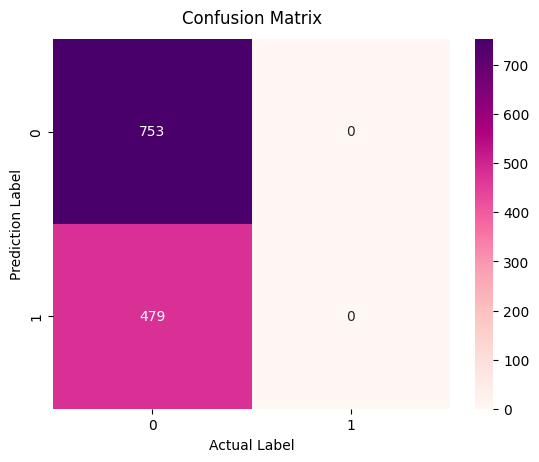

In [ ]:
sns.heatmap(data=confusion_matrix(y_test, xgb_model.predict(x_test)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Text(50.722222222222214, 0.5, 'Prediction Label')

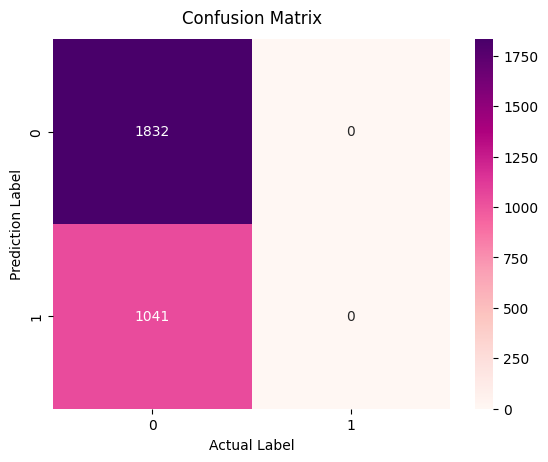

In [ ]:
sns.heatmap(data=confusion_matrix(y_train, xgb_model.predict(x_train)), annot = True, cmap="RdPu",fmt='g')
plt.title('Confusion Matrix', y=1.02)
plt.xlabel('Actual Label')
plt.ylabel('Prediction Label')

Additional evaluation

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(classifier, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[1688,  144],
       [ 648,  393]])

The first row pertains to the not-potable predictions; 1200 values were accurately classified as unfit for human consumption (also known as true negatives), whereas 188 values were incorrectly labeled as unfit for human consumption (also known as false positives). Regarding the potable-predictions, the second row shows that 295 values were accurately classified as surviving (true positives) and 610 values were incorrectly labeled as potable (false negatives).

In [ ]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7318435754189944
Recall: 0.37752161383285304


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.49809885931558934

***Conclusion:***

* Top Performer: Random Forest stands out with the highest test
accuracy, making it potentially the most effective model for our dataset. However, the perfect training accuracy indicates that it might be too complex or overly fitted to the training data.​

* Balanced Models: SVM offers the best balance between training and testing accuracies, making it a strong candidate for scenarios where generalization is critical.​

* Concern for Overfitting and Underfitting: While models like Random Forest and Decision Tree show overfitting, Logistic Regression, SGD, and XGBoost display underfitting, suggesting that these models might benefit from additional feature engineering or more complex model architectures.​

Recommendations for Improvement:​

* For overfitting models like Random Forest and Decision Tree, techniques such as pruning (for Decision Tree) or increasing the number of estimators and tweaking other hyperparameters (for Random Forest) could be explored.​

* For underfitting models, experimenting with more complex models or increasing the model's capacity might help. Also, feature engineering to introduce more variability and potentially informative features could be beneficial.​

SVM seems to require minor tweaks as it already shows promising results. Investigating kernel types or regularization parameters could further enhance its performance.​

# **Comparison of Algorithms**

---



<table style="width:80%">
    <tr>
        <th  style='text-align:center'>Algorithms</th>
        <th  style='text-align:center'>Accuracy</th>
    </tr>
    <tr>
        <td  style='text-align:center'>KNN-K Nearest Neighbor</td>
        <td  style='text-align:center'>Train: 83.43 , Test:68.67 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>Decision tree</td>
        <td  style='text-align:center'>Train: 87.43 , Test:68.83 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>Random Forest</td>
        <td  style='text-align:center'>Train: 100 , Test: 75.41 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>Naive Bayes</td>
        <td  style='text-align:center'>Train: 63.73 , Test:62.42 </td>
    </tr>     
    <tr>
        <td  style='text-align:center'>Logistic Regression</td>
        <td  style='text-align:center'>Train: 63.77 , Test:61.12 </td>
    </tr>   
    <tr>
        <td  style='text-align:center'>Stochastic Gradient Descent</td>
        <td  style='text-align:center'>Train: 63.77 , Test:60.88 </td>
    </tr>  
    <tr>
        <td  style='text-align:center'>SVM- Support Vector Machine</td>
        <td  style='text-align:center'>Train: 73.99, Test:69.07 </td>
    </tr>
    <tr>
        <td  style='text-align:center'>XGBoost</td>
        <td  style='text-align:center'>Train: 63.766, Test:61.12 </td>
    </tr>